In [19]:
# All libraries required in the experiment
import os
import gc
import psutil
import timeit
import pydotplus
import numpy as np  
import collections
import pandas as pd 
import seaborn as sns   
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image

from sklearn.metrics import f1_score
import matplotlib.gridspec as gridspec
from sklearn.metrics import recall_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 

In [20]:
#Loading dataset
attributes=["Sample code number","Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
attributes1=["Sample code number","Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"]
df= pd.read_csv("./dataset/breast-cancer-wisconsin.data",header=None,names=attributes, na_values=['?'])
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [21]:
# df['Class'].replace(to_replace= 2, value = 0, inplace = True)
# df['Class'].replace(to_replace= 4, value = 1, inplace = True)
df = df.drop(columns=["Sample code number"])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [22]:
df.isnull().sum().sum()

16

As we can see that Bare Nuclie has 16 missing values, so we'll replace it with mode.

In [23]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum().sum()

0

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
dtypes: float64(1), int64(8)
memory usage: 49.2 KB


In [25]:
str_cols = X.columns.tolist()

### Correlation Matrix

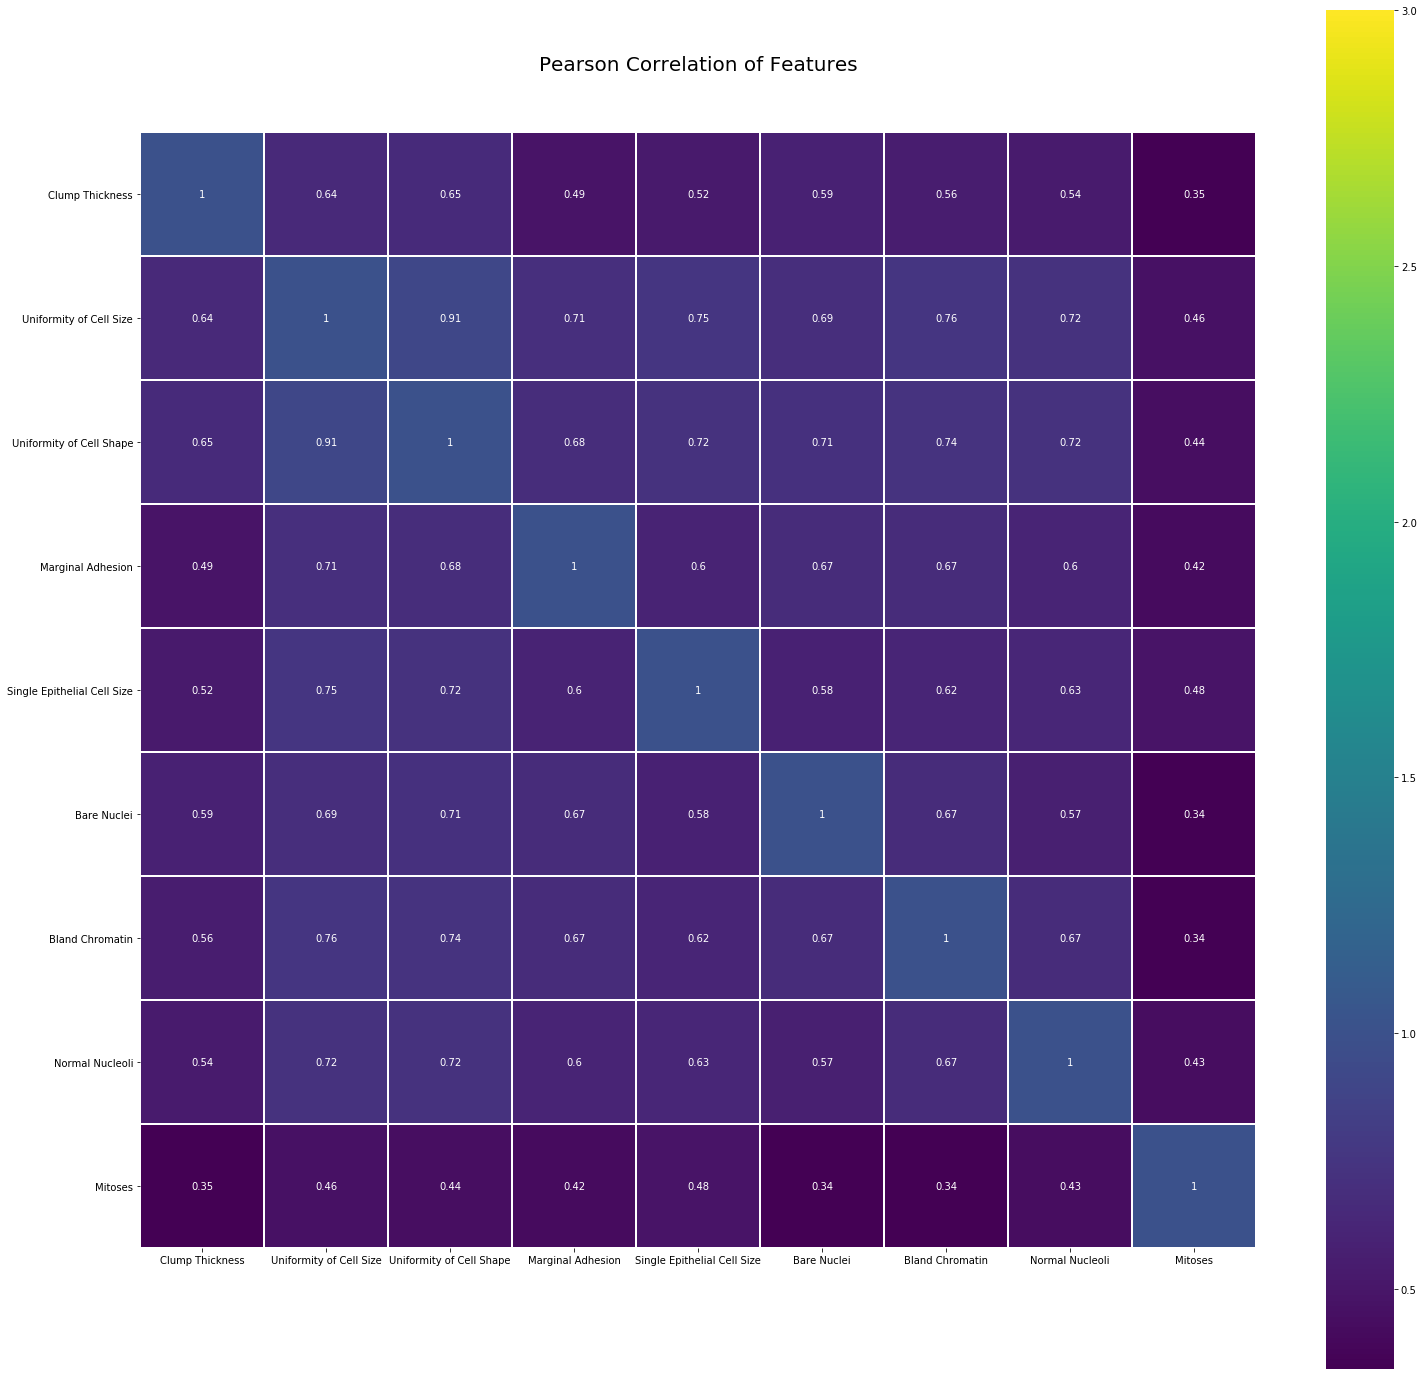

In [8]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X.astype(float).corr(),linewidths=1.0,vmax=3.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
#Function to calculate memory
p= psutil.Process(os.getpid())

def print_mem():
    print("The memory usage for CART is- {:.0f}MB".format(p.memory_info().rss/1e6))

In [10]:
#CART with default parameters
start_training = timeit.default_timer()
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
stop_training = timeit.default_timer()
train_time1=(stop_training - start_training)
train_score = clf_dt.score(X_train, y_train)*100
test_score = clf_dt.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)
print("Training Time in (secs):",train_time1)
print_mem()

Train score 100.0
Test score 94.37229437229438
Training Time in (secs): 0.0022719824783867075
The memory usage for CART is- 152MB


In [11]:
start_classification1 = timeit.default_timer()
y_pred_en_gini = clf_dt.predict(X_test)
y_pred_en_gini
stop_classification1 = timeit.default_timer()
classification_time1=(stop_classification1 - start_classification1)
score1=accuracy_score(y_test,y_pred_en_gini)
score1
m1=mean_squared_error(y_test, y_pred_en_gini)  
print("Accuracy score",score1)
print("Classification Time in (secs):",classification_time1)
CART_Default = score1
print("The mean squared Error is: ", m1)

Accuracy score 0.9437229437229437
Classification Time in (secs): 0.0012727322824375165
The mean squared Error is:  0.05627705627705628


In [12]:
print("\t\tConfusion matrix for CART")
print(confusion_matrix(y_test, y_pred_en_gini))  
print("\t\tClassification matrix for CART")
print(classification_report(y_test, y_pred_en_gini))

		Confusion matrix for CART
[[148   6]
 [  7  70]]
		Classification matrix for CART
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       154
           1       0.92      0.91      0.92        77

   micro avg       0.94      0.94      0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231



In [13]:
#Calculating misclassified samples
count_misclassified1 = (y_test != y_pred_en_gini).sum()
print('Misclassified samples: {}'.format(count_misclassified1))

Misclassified samples: 13


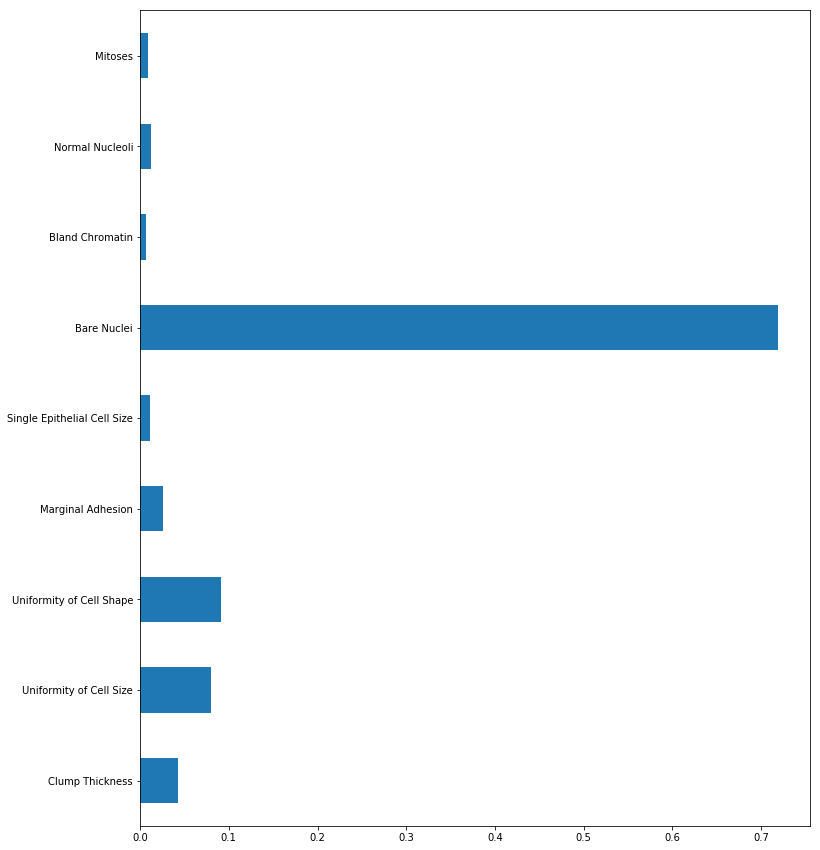

In [14]:
importances=pd.Series(clf_dt.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,15))

In [15]:
#Plotting Decision Tree with default parameters
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"40,40!"')
graph.write_png('CART.png')
Image(graph.create_png())

ValueError: Length of feature_names, 10 does not match number of features, 9

#  CART

In [28]:
import time
from sklearn.metrics import precision_recall_fscore_support
def find_best_clf(n, X, y, classifier, parameters, labels, cv=5):

    best_para = []
    best_tree = []
    train_score = []
    test_score = []
    train_time = []
    classification_time = []
    
    precision = []
    recall = []
    fmeasure = []
    
    for i in range(n):
        print("Iteration {}".format(i))
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        print(y_train)
        gridsearch = GridSearchCV(clf_dt, parameters, cv=cv, return_train_score=True)
        gridsearch.fit(X_train, y_train)
        grid_search_result = pd.DataFrame(gridsearch.cv_results_ )
        
        optimal_tree = gridsearch.best_estimator_
        
        ###########################################################
        
        best_para.append(gridsearch.best_params_)
        best_tree.append(optimal_tree)
        test_score.append(optimal_tree.score(X_test, y_test))
        train_score.append(gridsearch.cv_results_['mean_train_score'][gridsearch.best_index_])
        classification_time.append(gridsearch.cv_results_['mean_score_time'][gridsearch.best_index_])
        train_time.append(gridsearch.cv_results_['mean_fit_time'][gridsearch.best_index_])
        
        y_pred = optimal_tree.predict(X_test)
        pr, r, fs, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred)
        precision.append(pr)
        recall.append(r)
        fmeasure.append(fs)
        
    return best_para, best_tree, train_score, test_score, train_time, classification_time, precision, recall, fmeasure

In [27]:
from implementaion.Decisiontree import DecisionTreeNode

parameters = {"max_depth": [1, 5, 8, 10, 20, 100, 1000]}

labels = [0,1]

clf_dt = DecisionTreeNode(max_depth=1, cat_features=str_cols)
best_para, best_tree, train_score, test_score, train_time, classification_time ,precision, recall, fmeasure= find_best_clf(1, X, y, clf_dt, parameters, labels)

Iteration 0


In [24]:
for stats, name in zip([train_score, test_score, train_time, classification_time], ["train_score", "test_score", "train_time", "classification_time"]):
    print("Average {}: {}".format(name, np.average(stats)))

Average train_score: 0.9808229337935723
Average test_score: 0.9337662337662337
Average train_time: 1.0544376897811891
Average classification_time: 0.010241575241088867


In [26]:
(1-0.9337662337662337)*df.shape[0]*0.33

15.278142857142877

In [23]:
for stats, name in zip([precision, recall, fmeasure], ["precision", "recall", "fmeasure"]):
    avg = np.average(stats, axis = 0)
    print("Average cls0 {}: {}".format(name, avg[0]))
    print("Average cls1 {}: {}".format(name, avg[1]))

Average cls0 precision: 0.9525716978786256
Average cls1 precision: 0.9008652672984191
Average cls0 recall: 0.9481984576625289
Average cls1 recall: 0.9067697705710461
Average cls0 fmeasure: 0.9498816661802202
Average cls1 fmeasure: 0.9020034979691942


In [25]:
print(max(test_score))
idx = test_score.index(max(test_score))
print("best parameters: {}".format(best_para[idx]))

0.961038961038961
best parameters: {'max_depth': 5}


# C4.5

In [33]:
from implementaion.Decisiontree_C45 import DecisionTreeC45Node

parameters = {"max_depth": [1, 5, 8, 10, 20, 100, 1000]}

clf_dt = DecisionTreeC45Node(max_depth=5, cat_features=str_cols)
best_para, best_tree, train_score, test_score, train_time, classification_time ,precision, recall, fmeasure= find_best_clf(10, X, y, clf_dt, parameters, labels)


Iteration 0
355    2
606    2
258    2
656    2
44     4
427    4
563    2
80     2
139    2
229    4
488    4
682    2
552    2
531    2
441    2
491    4
346    2
678    2
197    2
345    2
668    4
631    2
589    2
546    4
124    4
591    4
375    2
152    4
230    4
469    2
      ..
672    2
673    2
32     4
562    2
182    2
134    2
337    2
545    2
267    4
302    4
543    2
33     2
27     2
234    2
223    4
482    4
104    4
406    2
359    4
70     2
334    4
233    4
571    4
670    4
576    2
332    2
170    2
353    4
13     2
228    2
Name: Class, Length: 468, dtype: int64


ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [11]:
for stats, name in zip([train_score, test_score, train_time, classification_time], ["train_score", "test_score", "train_time", "classification_time"]):
    print("Average {}: {}".format(name, np.average(stats)))

    
for stats, name in zip([precision, recall, fmeasure], ["precision", "recall", "fmeasure"]):
    avg = np.average(stats, axis = 0)
    print("Average cls0 {}: {}".format(name, avg[0]))
    print("Average cls1 {}: {}".format(name, avg[1]))

Average train_score: 0.9748890658778018
Average test_score: 0.9523809523809523
Average train_time: 1.1632626056671143
Average classification_time: 0.009402227401733399
Average cls0 precision: 0.9512195121951219
Average cls1 precision: 0.9552238805970149
Average cls0 recall: 0.9811320754716981
Average cls1 recall: 0.8888888888888888
Average cls0 fmeasure: 0.9659442724458204
Average cls1 fmeasure: 0.9208633093525178


In [12]:
print(max(test_score))
idx = test_score.index(max(test_score))
print("best parameters: {}".format(best_para[idx]))

0.9523809523809523
best parameters: {'max_depth': 5}


In [13]:
best_tree[idx].print_tree()

 X1 < 3.0 
  X5 < 5.0 
   X0 < 8.0 
    [0]
    X2 < 3.0 
     [0]
     [1]
   X0 < 4.0 
    [0]
    [1]
  X1 < 5.0 
   X5 < 7.0 
    X7 < 9.0 
     [0]
     [1]
    X3 < 5.0 
     [1]
     [1]
   X6 < 5.0 
    X0 < 7.0 
     [1]
     [1]
    [1]
